<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/pytorch_day3_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\textbf{DataLoaders in Pytorch}$$

---
---

 PyTorch provides two data primitives:
  - `torch.utils.data.Dataset`
  - `torch.utils.data.DataLoader`  


 which allow you to use $pre-loaded$ datasets as well as your $own$ data.


 **Note:** `Dataset` stores the $samples$ and their corresponding $labels$, and `DataLoader` wraps an $iterable$ around the Dataset which enable easy access to the samples.

 <br>

# $\textbf{1. Loading a Dataset From TorchVision}$

---

We load the $FashionMNIST$ Dataset with the following parameters:
`root` is the path where the $train/test$ data is stored,

- `train=True/False` specifies training or test dataset,

- `download=True/False` downloads the data from the internet if it’s not available at root.

- `transform` and `target_transform` specify the $feature$ and $label$ transformations

In [1]:
import torch
from torchvision import datasets #it contains popular dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training = datasets.FashionMNIST(
    root='data',
    train = True,
    download = False,
    transform = ToTensor()
)

RuntimeError: Dataset not found. You can use download=True to download it

In [5]:
train = datasets.FashionMNIST(
    root='data',
    train = True,
    download = True,
    transform = ToTensor()
)

In [6]:
test = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = False,
    transform = ToTensor()
)

$Note:$ You necessary need not to do `download = True` atleast once either during loading the train data or loading the test data you root directory is empty or not there at all.

<br>

## $\textbf{Exploring the dataset:}$

In [8]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Getting the item at $0$th index

In [25]:
train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

<br>

$\text{Lets explore How each data points are Stored:}$

In [26]:
len(train[0])

2

There are $2$ elements stored into each data point, possibly one is image tensor and other is label ?


In [27]:
train[0][1]

9

The number $9$ in the output corresponds to the label of the image at $index$ $0$.

if you do `train[0][0]` you will get data in tensor form of the image stored at $0$th index.

<br>
<br>

## $\textbf{Visualizing the Dataset}$

---

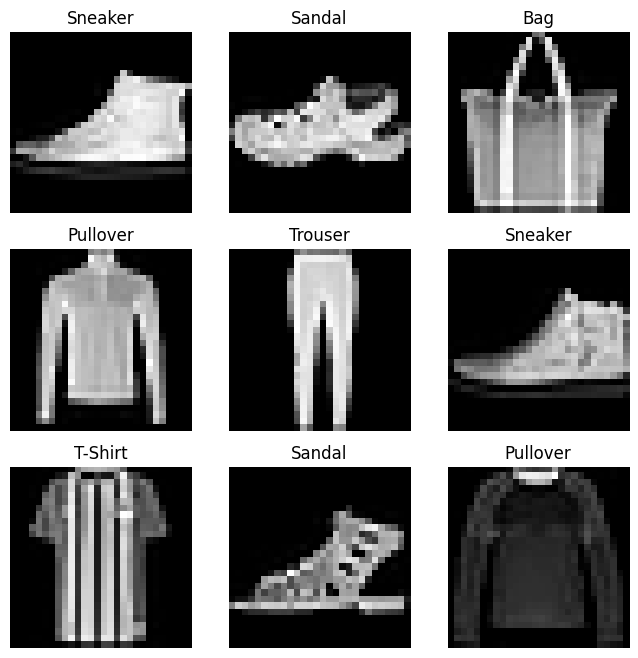

In [31]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train), size=(1,)).item()
    img, label = train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<br>
<br>

## $\textbf{Pytorch DataLoader}$

---
- The `Dataset` retrieves our dataset’s features and labels one sample at a time

- While training a model, we typically want to pass samples in $minibatches$, reshuffle the data at every epoch to reduce model overfitting.

In [32]:
from torch.utils.data import DataLoader

$Hyperparameters$ of DataLoader

- $data$
- $batch\_size$, int : num of samples you want to feed during a single epoch
- $shuffle$ : boolean

In [39]:
train_dataloader = DataLoader(train, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test, batch_size=8, shuffle=True)

#### $\textbf{Iterate through the DataLoader}$

---


In [40]:
train_dataloader

You can see that $train\_dataloader$ object is not iterator. How to convert it $iterator$ ? We use $iter$ function predefined in python.

<br>


- $\text{But why we need to make it an iterator ?}$

 Because Iterators are typically used when you only need to pass through the data once.

<br>

- $\text{If you want to learn about iterator here please visit here:}$ [$Link$](https://www.youtube.com/watch?v=afPzjnprlsY)

In [41]:
iter(train_dataloader)

$\_SingleProcessDataLoaderIter:$ This iterator handles fetching and yielding data batches one at a time from the dataset.

<br>

In [42]:
next(iter(train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

- `train_dataloader` is responsible for batching and loading data from your dataset.
- By setting `batch_size=8`, `train_dataloader` ensures that each batch contains 8 samples.
- You can access and process these batches one at a time during training or evaluation of your model.


In [65]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([8, 1, 28, 28])
Labels batch shape: torch.Size([8])


In [66]:
type(train_features)

torch.Tensor

In [67]:
print(type(train_features[0]), type(train_features[0][0][0][0]))

<class 'torch.Tensor'> <class 'torch.Tensor'>


$\textbf{Let's see what we got at index 0}$

In [68]:
train_features[0].size()

torch.Size([1, 28, 28])

In [69]:
type(train_features[0].squeeze())

torch.Tensor

In [70]:
train_features[0].squeeze().size()

torch.Size([28, 28])

In [71]:
img = train_features[0].squeeze()
label = train_labels[0]

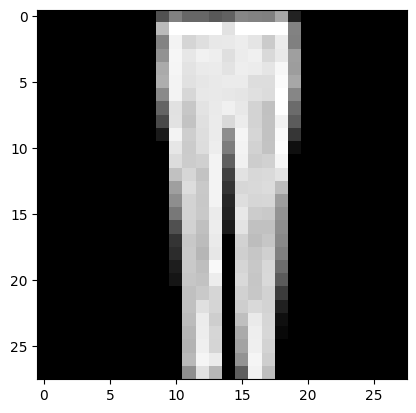

Label: 1


In [72]:
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

<br>
<br>

# $\textbf{2. Custom DataLoader}$

---

To create a custom dataset in PyTorch, follow these steps:

1. **Subclass `Dataset`**: Define a new class that inherits from `torch.utils.data.Dataset`.

2. **Implement Key Methods**:

   - `__init__(self, ...)`: Initialize your dataset. This method is used to load file paths, preprocessing parameters, and other necessary setup.
   
     ```python
     def __init__(self, data, labels, transform=None):
         self.data = data
         self.labels = labels
         self.transform = transform
     ```
   
   - `__len__(self)`: Return the number of samples in the dataset. This method should provide the total length of the dataset.
   
     ```python
     def __len__(self):
         return len(self.data)
     ```
   
   - `__getitem__(self, index)`: Fetch and return a sample for a given index. This method handles data loading and any necessary transformations.
   

In [76]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [111]:
class HousingDataset(Dataset):
    def __init__(self, file_path):
        self.file_path = file_path
        self.num_rows = sum(1 for _ in open(file_path)) - 1
        self.transform = None
        self.target_transform = None

    def __len__(self):
        return self.num_rows

    def __getitem__(self, idx):
        df = pd.read_csv(self.file_path)
        features = torch.tensor(df.iloc[idx, :-1].values, dtype=torch.float32)
        label = torch.tensor(df.iloc[idx, -1], dtype=torch.float32)

        if self.transform:
            features = self.transform(features)

        if self.target_transform:
            label = self.target_transform(label)

        return features, label


In [103]:
train = HousingDataset('sample_data/california_housing_train.csv')
test = HousingDataset('sample_data/california_housing_test.csv')

In [104]:
train_loader = DataLoader(train, batch_size=8, shuffle=True)

In [105]:
next(iter(train_loader))

[tensor([[-1.1800e+02,  3.3660e+01,  1.6000e+01,  2.8090e+03,  7.0800e+02,
           1.2600e+03,  6.3800e+02,  3.2353e+00],
         [-1.2072e+02,  3.8570e+01,  8.0000e+00,  8.9200e+02,  1.8500e+02,
           4.2700e+02,  1.6400e+02,  2.6833e+00],
         [-1.2186e+02,  3.7310e+01,  2.4000e+01,  1.9390e+03,  6.5200e+02,
           1.8080e+03,  6.2500e+02,  2.2259e+00],
         [-1.2196e+02,  3.8330e+01,  3.0000e+00,  7.9850e+03,  1.2570e+03,
           3.6640e+03,  1.2150e+03,  4.9760e+00],
         [-1.1886e+02,  3.4210e+01,  2.6000e+01,  3.3540e+03,  6.5900e+02,
           2.0200e+03,  6.4800e+02,  4.1576e+00],
         [-1.2249e+02,  3.8290e+01,  2.6000e+01,  1.7260e+03,  2.8900e+02,
           6.7200e+02,  2.5100e+02,  3.8000e+00],
         [-1.2113e+02,  3.8870e+01,  4.8000e+01,  1.1270e+03,  1.8800e+02,
           5.3000e+02,  1.8600e+02,  3.0917e+00],
         [-1.1814e+02,  3.4090e+01,  2.0000e+01,  3.4470e+03,  1.0070e+03,
           2.6220e+03,  9.3400e+02,  2.9180e+00]])


---

$$\textbf{Thank You for reading}$$


